# **Projet Télédétection Landes - Marion BILLY**

## I - Introduction

Série temporelle Sentinel-2 utilisée: Bretagne 24-25   
*2025-03-31     
2025-04-10	  
2025-05-15	  
2025-06-17	  
2025-07-12	  
2025-08-10*  

Echantillon: PI_strates_bretagne.shp   
Champ strate qui contient les labels numériques des classes:   
*1	Sol Nu    
2	Herbe    
3	Landes    
4	Arbre*    

Extraction des séries temporelles par bande Sentinel, chaque bande d’un fichier correspondant à une date (même ordre que ci-dessus)

In [30]:
# import des librairies
import sys
sys.path.append("/home/onyxia/work")
import geopandas as gpd
import os
import numpy as np

# personal librairies
from libsigma import read_and_write as rw

In [35]:
import os
import numpy as np
import read_and_write as rw

base_path = "/home/onyxia/work/data/projet_eval/"
bands = ["B02","B03","B04","B05","B06","B07","B08","B8A","B11","B12"]
dates = ["2025-03-31","2025-04-10","2025-05-15","2025-06-17","2025-07-12","2025-08-10"]

for i, date in enumerate(dates):
    band_arrays = []
    for band in bands:
        filename = os.path.join(base_path, f"bretagne_24-25_{band}.tif")
        arr = rw.load_img_as_array(filename)  # shape = (lignes, colonnes, nb_dates)
        # extraire la bande correspondant à la date i
        single_band = arr[:, :, i]
        # s'assurer que c'est 3D pour write_image
        band_arrays.append(np.atleast_3d(single_band))
    
    # concaténer toutes les bandes pour cette date
    all_bands = np.dstack(band_arrays)  # shape = (lignes, colonnes, nb_bandes)
    
    out_filename = os.path.join(base_path, f"bretagne_{date}.tif")
    rw.write_image(out_filename, all_bands, data_set=rw.open_image(os.path.join(base_path, f"bretagne_24-25_{bands[0]}.tif")))
    print(f"Fichier créé pour {date} -> {out_filename}")

Fichier créé pour 2025-03-31 -> /home/onyxia/work/data/projet_eval/bretagne_2025-03-31.tif
Fichier créé pour 2025-04-10 -> /home/onyxia/work/data/projet_eval/bretagne_2025-04-10.tif
Fichier créé pour 2025-05-15 -> /home/onyxia/work/data/projet_eval/bretagne_2025-05-15.tif
Fichier créé pour 2025-06-17 -> /home/onyxia/work/data/projet_eval/bretagne_2025-06-17.tif
Fichier créé pour 2025-07-12 -> /home/onyxia/work/data/projet_eval/bretagne_2025-07-12.tif
Fichier créé pour 2025-08-10 -> /home/onyxia/work/data/projet_eval/bretagne_2025-08-10.tif


## II - Analyse des échantillons

### 1. Nombre d'échantillons

⚠️ vous n’avez pas à rendre à proprement parlé les graphiques affichés, vous devez les afficher dans votre notebook et les commenter. Néanmoins, vous devez écrire des instructions Python qui permettent d’enregistrer les graphiques dans un dossier results/figure.
Vous devrez utiliser la bibliothèque matplotlib ou Plotly pour la réalisation de ces graphiques.

In [31]:
import matplotlib.pyplot as plt

gdf = gpd.read_file("/home/onyxia/work/data/projet_eval/PI_strates_bretagne_32630.shp")
gdf.head()

,id,strate,comment,geometry
0,1,3,lande basse,"POLYGON ((441224.58 5366298.317, 441224.779 53..."
1,2,3,lande basse,"POLYGON ((441649.972 5366251.139, 441650.172 5..."
2,3,3,lande basse,"POLYGON ((441383.597 5366193.034, 441384.395 5..."
3,4,2,None,"POLYGON ((441336.658 5366402.088, 441337.257 5..."
4,5,2,None,"POLYGON ((441062.121 5366343.165, 441062.919 5..."


#### Diagramme en bâton du nombre de polygones par classe, diag_baton_nb_poly_by_class.png

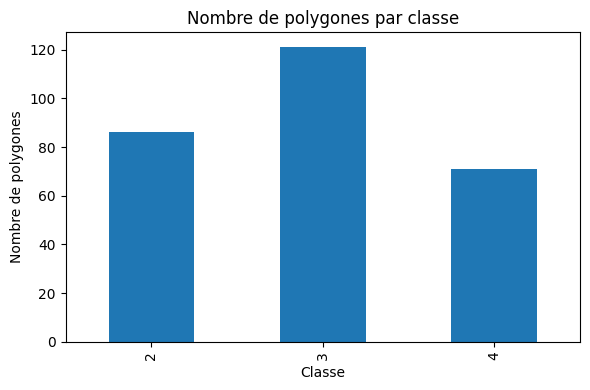

In [32]:
nb_poly = gdf["strate"].value_counts().sort_index()
plt.figure(figsize=(6,4))
nb_poly.plot(kind="bar")
plt.xlabel("Classe")
plt.ylabel("Nombre de polygones")
plt.title("Nombre de polygones par classe")
plt.tight_layout()
#plt.savefig("results/figure/diag_baton_nb_poly_by_class.png", dpi=300)
plt.show()

#### Diagramme en bâton du nombre de pixel par classe, diag_baton_nb_pix_by_class.png

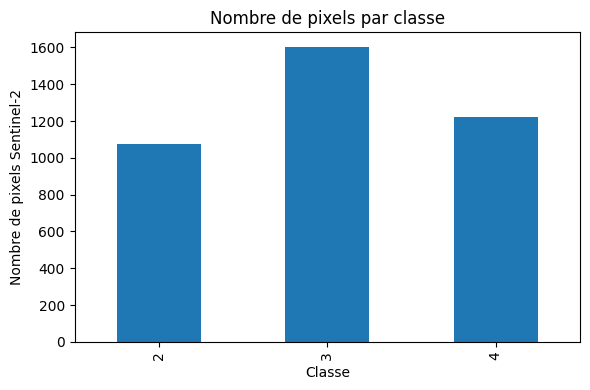

In [34]:
# Surface des polygones en m²
gdf["area_m2"] = gdf.geometry.area

# Nombre de pixels Sentinel-2 (10 m → 100 m² par pixel)
gdf["nb_pix"] = gdf["area_m2"] / 100

nb_pix_by_class = gdf.groupby("strate")["nb_pix"].sum()
plt.figure(figsize=(6,4))
nb_pix_by_class.plot(kind="bar")
plt.xlabel("Classe")
plt.ylabel("Nombre de pixels Sentinel-2")
plt.title("Nombre de pixels par classe")
plt.tight_layout()
#plt.savefig("results/figure/diag_baton_nb_pix_by_class.png", dpi=300)
plt.show()

### 2. Phénologie des strates, mise en évidence des landes

### 3. Production d’une d’essence forestière à l’échelle du pixel